In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
data=pd.read_csv("Ecommerce_Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
data['Avatar']

0                Violet
1             DarkGreen
2                Bisque
3           SaddleBrown
4      MediumAquaMarine
             ...       
495                 Tan
496       PaleVioletRed
497            Cornsilk
498                Teal
499         DarkMagenta
Name: Avatar, Length: 500, dtype: object

<Axes: xlabel='Time on App', ylabel='Time on Website'>

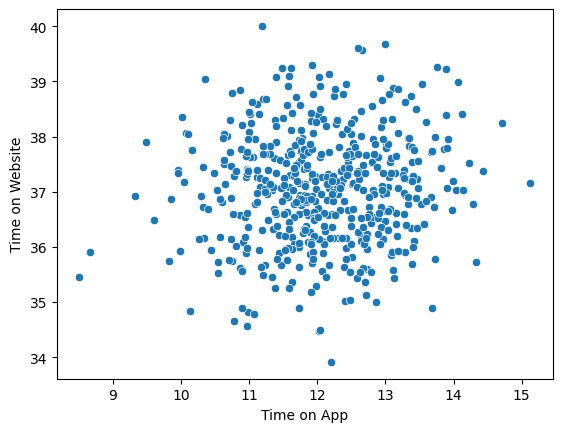

In [25]:
sns.scatterplot(x='Time on App',y='Time on Website',data=data)

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

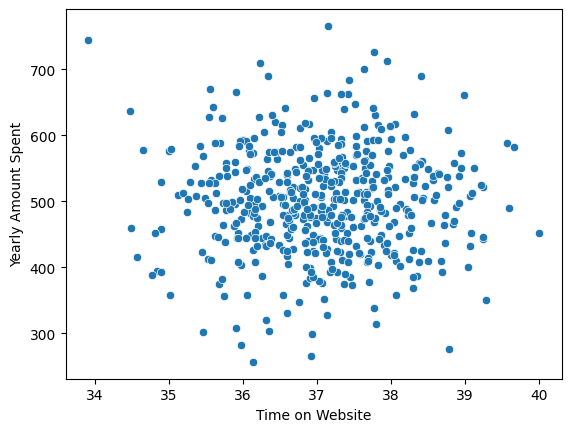

In [29]:
sns.scatterplot(data=data, x="Time on Website",y='Yearly Amount Spent')

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

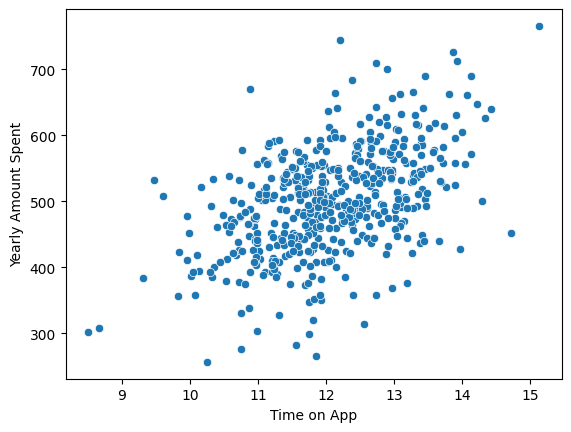

In [30]:
sns.scatterplot(data=data, x="Time on App", y="Yearly Amount Spent")

In [32]:
sns.set_palette("deep")
sns.set_style('whitegrid')

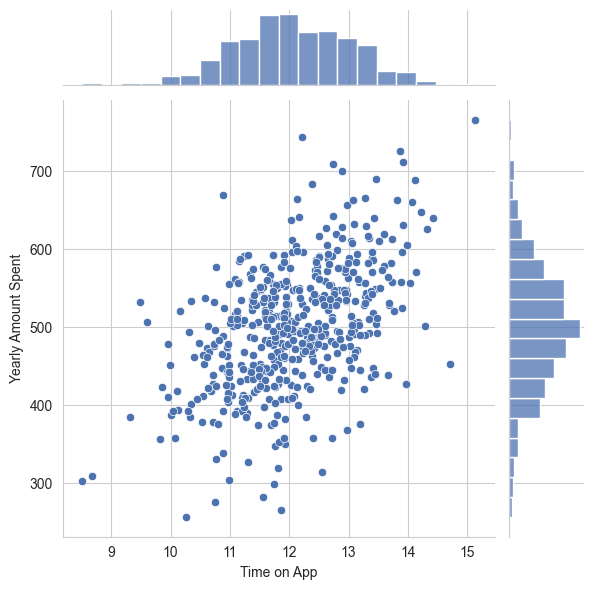

In [35]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data)

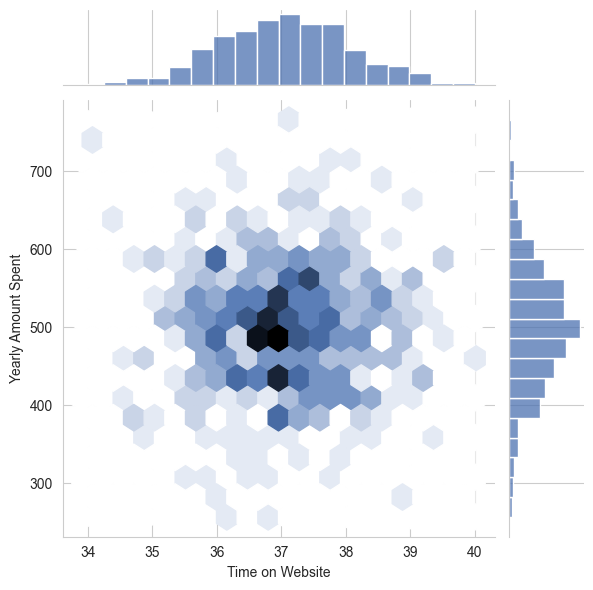

In [44]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',kind='hex',data=data)

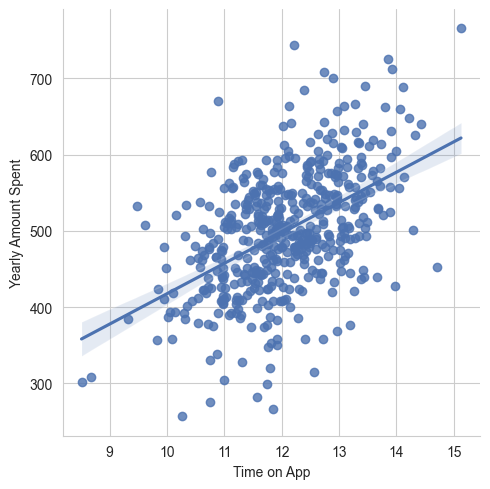

In [49]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=data)


In [54]:
X=data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=data[['Yearly Amount Spent']]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
X_test.sum()

Avg. Session Length     4964.373214
Time on App             1803.002957
Time on Website         5554.659162
Length of Membership     517.860518
dtype: float64

In [58]:
X_train.sum()

Avg. Session Length     11562.223545
Time on App              4223.241012
Time on Website         12975.563549
Length of Membership     1248.870260
dtype: float64

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [62]:
print("The co-efficient is: ",lr.coef_)

The co-efficient is:  [[ 2.57675297e+01  3.88003936e+01 -1.80409231e-02  6.18525679e+01]]


In [63]:
print("The Intercept is: ",lr.intercept_)

The Intercept is:  [-1037.82574857]


In [66]:
x_prediction=lr.predict(X_test)
x_prediction.sum()

74133.78778265652

Text(0, 0.5, 'Predicted Y')

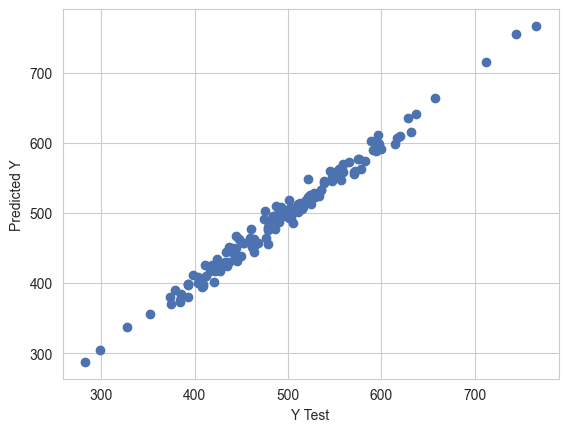

In [67]:
plt.scatter(y_test,x_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

In [72]:
from sklearn import metrics
import numpy as np
print("MAE: ",metrics.mean_absolute_error(y_test,x_prediction))
print("MSE: ",metrics.mean_squared_error(y_test,x_prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,x_prediction)))

MAE:  7.851377170861436
MSE:  94.55779479273262
RMSE:  9.724083236620952
